In [1]:
import numpy as np
from model import *
import random
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping
data=np.load("data/data.npz")
foot=data['arr_0']
target=data['arr_1']
foot=foot/255
random_state=42

16 ListWrapper([1, 1])
16 ListWrapper([1, 1])
32 ListWrapper([2, 1])
32 ListWrapper([1, 1])
64 ListWrapper([2, 1])
64 ListWrapper([1, 1])
128 ListWrapper([2, 1])
128 ListWrapper([1, 1])
Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2024-01-16 05:53:56.813428: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-16 05:53:57.444337: I tensorflow/core/common_runtime/gpu/gpu_process_state.cc:222] Using CUDA malloc Async allocator for GPU: 0
2024-01-16 05:53:57.444475: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 23440 MB memory:  -> device: 0, name: Tesla V100-DGXS-32GB, pci bus id: 0000:07:00.0, compute capability: 7.0


Model: "subclassing_model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_in (InputLayer)       [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 16)        800       
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 16)       64        
 ormalization)                                                   
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 24, 24, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 resnet_block (ResnetBlock)  (None, 12, 12, 16) 

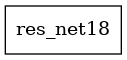

In [2]:
model=ResNet18(25)


def get_functional_model(model):
    # 이 코드는「이전 포스팅의 Functional API」와 거의 동일
    x = keras.layers.Input(shape=(48,48,1), name='layer_in')
    temp_model = tf.keras.Model(
        inputs=[x],
        outputs=model.call(x),  # ※서브 클래스화한 모델의 'call'메소드를 지정
        name='subclassing_model3')  # 임의의 모델에도 이름을 붙인다.
    return temp_model

# Functional API의「임의의 모델」을 취득
f_model = get_functional_model(model)

# 모델의 내용을 출력
f_model.summary()
model.build(input_shape = (None,48,48,1))
model.compile(optimizer = "adam",loss='categorical_crossentropy', metrics=["accuracy"]) 
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=False)
# import visualkeras
# visualkeras.layered_view(model,legend=True)

In [2]:
for i in range(25,26):
    test_acc=[]
    train_acc=[]
    valid_acc=[]
    for j in range(5):
        target_cnt=i
        x_train_all, t_train_all, x_validation_all, t_validation_all, x_validation,t_validation,x_train, t_train, x_test, t_test=\
        make_dataset(foot,target,target_cnt,random_state)
        #lenet5
#         model=lenet5(random_state)
        #AlexNet
#         model=alexnet(random_state)
        #ResNet 18
#         model=ResNet18(25)
        

#         def get_functional_model(model):
#             # 이 코드는「이전 포스팅의 Functional API」와 거의 동일
#             x = keras.layers.Input(shape=(48,48,1), name='layer_in')
#             temp_model = tf.keras.Model(
#                 inputs=[x],
#                 outputs=model.call(x),  # ※서브 클래스화한 모델의 'call'메소드를 지정
#                 name='subclassing_model3')  # 임의의 모델에도 이름을 붙인다.
#             return temp_model

#         # Functional API의「임의의 모델」을 취득
#         f_model = get_functional_model(model)

#         # 모델의 내용을 출력
#         f_model.summary()
#         model.build(input_shape = (None,48,48,1))
#         model.compile(optimizer = "adam",loss='categorical_crossentropy', metrics=["accuracy"]) 
        #vgg16
        model=VGG16(random_state)
        #googlenet
#         model=GoogLeNet(random_state)
        epoch=1000
        batch=128
        onehot_encoder = OneHotEncoder()
        early_stopping = EarlyStopping(monitor='val_loss',verbose=0,min_delta=0,patience=5,restore_best_weights=True)
        o_t_validation=onehot_encoder.fit_transform(t_validation_all).toarray()
        o_t_train=onehot_encoder.fit_transform(t_train_all).toarray()
        history =model.fit(x_train_all,o_t_train,epochs=epoch, validation_data=(x_validation_all, o_t_validation),batch_size=batch,verbose=1,callbacks=[early_stopping])
        o_t_test=onehot_encoder.fit_transform(t_test).toarray()
        test_acc.append(model.evaluate(x_test,o_t_test,verbose=0)[1])
        train_acc.append(model.evaluate(x_train_all,o_t_train,verbose=0)[1])
        valid_acc.append(model.evaluate(x_validation_all,o_t_validation,verbose=0)[1])
        createDirectory("./model_t/vgg/"+str(i)+str(j))
        model.save("./model_t/vgg/"+str(i)+str(j)+"/")
    arg=np.argmax(np.array(test_acc))
    print(train_acc[arg])
    print(valid_acc[arg])
    print(test_acc[arg])

tensorflow version =  2.9.1
keras version =  2.9.0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


2024-01-02 08:41:29.384861: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-02 08:41:30.004920: I tensorflow/core/common_runtime/gpu/gpu_process_state.cc:222] Using CUDA malloc Async allocator for GPU: 0
2024-01-02 08:41:30.005060: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30429 MB memory:  -> device: 0, name: Tesla V100-DGXS-32GB, pci bus id: 0000:07:00.0, compute capability: 7.0


 conv2d (Conv2D)             (None, 48, 48, 8)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 8)         584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 16)        1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 32)        4640      
          

2024-01-02 08:41:32.616250: I tensorflow/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8500


137/137 [==============================] - 6s 22ms/step - loss: 3.1645 - accuracy: 0.0553 - val_loss: 2.8053 - val_accuracy: 0.1140
Epoch 2/1000
137/137 [==============================] - 2s 16ms/step - loss: 2.3846 - accuracy: 0.2309 - val_loss: 2.0242 - val_accuracy: 0.3208
Epoch 3/1000
137/137 [==============================] - 2s 15ms/step - loss: 1.8431 - accuracy: 0.3809 - val_loss: 1.7378 - val_accuracy: 0.4068
Epoch 4/1000
137/137 [==============================] - 2s 15ms/step - loss: 1.6795 - accuracy: 0.4358 - val_loss: 1.6224 - val_accuracy: 0.4640
Epoch 5/1000
137/137 [==============================] - 2s 15ms/step - loss: 1.5709 - accuracy: 0.4737 - val_loss: 1.5216 - val_accuracy: 0.5004
Epoch 6/1000
137/137 [==============================] - 2s 15ms/step - loss: 1.5168 - accuracy: 0.4873 - val_loss: 1.5395 - val_accuracy: 0.4784
Epoch 7/1000
137/137 [==============================] - 2s 15ms/step - loss: 1.4415 - accuracy: 0.5139 - val_loss: 1.4241 - val_accuracy: 0.524

INFO:tensorflow:Assets written to: ./model_t/vgg/250/assets


INFO:tensorflow:Assets written to: ./model_t/vgg/250/assets


tensorflow version =  2.9.1
keras version =  2.9.0
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 48, 48, 8)         80        
                                                                 
 conv2d_14 (Conv2D)          (None, 48, 48, 8)         584       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 8)        0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 16)        1168      
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 16)        2320      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 16)       0         
 2D

Epoch 32/1000
137/137 [==============================] - 2s 15ms/step - loss: 0.5630 - accuracy: 0.8160 - val_loss: 0.6865 - val_accuracy: 0.7796
Epoch 33/1000
137/137 [==============================] - 2s 14ms/step - loss: 0.5112 - accuracy: 0.8305 - val_loss: 0.6418 - val_accuracy: 0.7992
Epoch 34/1000
137/137 [==============================] - 2s 14ms/step - loss: 0.5102 - accuracy: 0.8326 - val_loss: 0.6372 - val_accuracy: 0.7964
Epoch 35/1000
137/137 [==============================] - 2s 15ms/step - loss: 0.4851 - accuracy: 0.8407 - val_loss: 0.6224 - val_accuracy: 0.7996
Epoch 36/1000
137/137 [==============================] - 2s 15ms/step - loss: 0.4774 - accuracy: 0.8418 - val_loss: 0.6154 - val_accuracy: 0.8096
Epoch 37/1000
137/137 [==============================] - 2s 14ms/step - loss: 0.4880 - accuracy: 0.8346 - val_loss: 0.6166 - val_accuracy: 0.8060
Epoch 38/1000
137/137 [==============================] - 2s 15ms/step - loss: 0.4434 - accuracy: 0.8546 - val_loss: 0.5765 -

INFO:tensorflow:Assets written to: ./model_t/vgg/251/assets


INFO:tensorflow:Assets written to: ./model_t/vgg/251/assets


tensorflow version =  2.9.1
keras version =  2.9.0
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 48, 48, 8)         80        
                                                                 
 conv2d_27 (Conv2D)          (None, 48, 48, 8)         584       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 24, 24, 16)        1168      
                                                                 
 conv2d_29 (Conv2D)          (None, 24, 24, 16)        2320      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 16)       0         
 g2

Epoch 32/1000
137/137 [==============================] - 2s 15ms/step - loss: 0.5926 - accuracy: 0.8001 - val_loss: 0.6752 - val_accuracy: 0.7828
Epoch 33/1000
137/137 [==============================] - 2s 15ms/step - loss: 0.5332 - accuracy: 0.8208 - val_loss: 0.6700 - val_accuracy: 0.7888
Epoch 34/1000
137/137 [==============================] - 2s 16ms/step - loss: 0.5372 - accuracy: 0.8198 - val_loss: 0.6487 - val_accuracy: 0.7972
Epoch 35/1000
137/137 [==============================] - 2s 14ms/step - loss: 0.5122 - accuracy: 0.8303 - val_loss: 0.6867 - val_accuracy: 0.7760
Epoch 36/1000
137/137 [==============================] - 2s 14ms/step - loss: 0.4968 - accuracy: 0.8353 - val_loss: 0.5891 - val_accuracy: 0.8152
Epoch 37/1000
137/137 [==============================] - 2s 14ms/step - loss: 0.4858 - accuracy: 0.8347 - val_loss: 0.6187 - val_accuracy: 0.8036
Epoch 38/1000
137/137 [==============================] - 2s 14ms/step - loss: 0.4430 - accuracy: 0.8534 - val_loss: 0.6150 -

INFO:tensorflow:Assets written to: ./model_t/vgg/252/assets


INFO:tensorflow:Assets written to: ./model_t/vgg/252/assets


tensorflow version =  2.9.1
keras version =  2.9.0
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 48, 48, 8)         80        
                                                                 
 conv2d_40 (Conv2D)          (None, 48, 48, 8)         584       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 24, 24, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 24, 24, 16)        1168      
                                                                 
 conv2d_42 (Conv2D)          (None, 24, 24, 16)        2320      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 16)       0         
 g2

Epoch 32/1000
137/137 [==============================] - 2s 14ms/step - loss: 0.5617 - accuracy: 0.8127 - val_loss: 0.6837 - val_accuracy: 0.7744
Epoch 33/1000
137/137 [==============================] - 2s 14ms/step - loss: 0.5263 - accuracy: 0.8236 - val_loss: 0.6858 - val_accuracy: 0.7752
Epoch 34/1000
137/137 [==============================] - 2s 14ms/step - loss: 0.4974 - accuracy: 0.8366 - val_loss: 0.6043 - val_accuracy: 0.8020
Epoch 35/1000
137/137 [==============================] - 2s 14ms/step - loss: 0.4844 - accuracy: 0.8403 - val_loss: 0.6375 - val_accuracy: 0.7980
Epoch 36/1000
137/137 [==============================] - 2s 14ms/step - loss: 0.4731 - accuracy: 0.8426 - val_loss: 0.5928 - val_accuracy: 0.8220
Epoch 37/1000
137/137 [==============================] - 2s 14ms/step - loss: 0.4836 - accuracy: 0.8394 - val_loss: 0.5971 - val_accuracy: 0.8056
Epoch 38/1000
137/137 [==============================] - 2s 14ms/step - loss: 0.4410 - accuracy: 0.8525 - val_loss: 0.5775 -

INFO:tensorflow:Assets written to: ./model_t/vgg/253/assets


INFO:tensorflow:Assets written to: ./model_t/vgg/253/assets


tensorflow version =  2.9.1
keras version =  2.9.0
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 48, 48, 8)         80        
                                                                 
 conv2d_53 (Conv2D)          (None, 48, 48, 8)         584       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 24, 24, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 24, 24, 16)        1168      
                                                                 
 conv2d_55 (Conv2D)          (None, 24, 24, 16)        2320      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 12, 12, 16)       0         
 g2

Epoch 32/1000
137/137 [==============================] - 2s 15ms/step - loss: 0.5519 - accuracy: 0.8176 - val_loss: 0.6128 - val_accuracy: 0.8056
Epoch 33/1000
137/137 [==============================] - 2s 15ms/step - loss: 0.5044 - accuracy: 0.8341 - val_loss: 0.5899 - val_accuracy: 0.8004
Epoch 34/1000
137/137 [==============================] - 2s 15ms/step - loss: 0.5011 - accuracy: 0.8333 - val_loss: 0.5768 - val_accuracy: 0.8080
Epoch 35/1000
137/137 [==============================] - 2s 15ms/step - loss: 0.4669 - accuracy: 0.8451 - val_loss: 0.5535 - val_accuracy: 0.8240
Epoch 36/1000
137/137 [==============================] - 2s 15ms/step - loss: 0.4561 - accuracy: 0.8462 - val_loss: 0.5546 - val_accuracy: 0.8176
Epoch 37/1000
137/137 [==============================] - 2s 15ms/step - loss: 0.4507 - accuracy: 0.8477 - val_loss: 0.5803 - val_accuracy: 0.8120
Epoch 38/1000
137/137 [==============================] - 2s 15ms/step - loss: 0.4074 - accuracy: 0.8673 - val_loss: 0.5473 -

INFO:tensorflow:Assets written to: ./model_t/vgg/254/assets


INFO:tensorflow:Assets written to: ./model_t/vgg/254/assets


0.9621142745018005
0.9232000112533569
0.9039999842643738


In [23]:
model_path="./model/google/"+str(25)+str(0)+"/"
newmodel=tf.keras.models.load_model(model_path)

In [24]:
model=Model(newmodel.input,newmodel.output[0])
model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])


In [5]:
model_path="./model_t/vgg/"+str(25)+str(arg)+"/"
model=tf.keras.models.load_model(model_path)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 48, 48, 8)         80        
                                                                 
 conv2d_53 (Conv2D)          (None, 48, 48, 8)         584       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 24, 24, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 24, 24, 16)        1168      
                                                                 
 conv2d_55 (Conv2D)          (None, 24, 24, 16)        2320      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 12, 12, 16)       0         
 g2D)                                                 

In [6]:
from keras.utils.vis_utils import plot_model
o_t_test=onehot_encoder.fit_transform(t_test).toarray()
print(model.evaluate(x_test,o_t_test,verbose=0,return_dict=True))
print(model.evaluate(x_train_all,o_t_train,verbose=0,return_dict=True))
print(model.evaluate(x_validation_all,o_t_validation,verbose=0,return_dict=True))

{'loss': 0.35438716411590576, 'accuracy': 0.9039999842643738}
{'loss': 0.12396139651536942, 'accuracy': 0.9621142745018005}
{'loss': 0.2883799374103546, 'accuracy': 0.9232000112533569}


In [7]:
def predict_tflite_path(tflite_model, x_test):
    # Prepare the test data
    x_test_ = x_test.copy()
    #x_test_ = x_test_.reshape(x_test.size,48,48,1)
    
    
    # Initialize the TFLite interpreter
    interpreter = tf.lite.Interpreter(model_path=tflite_model)
    interpreter.allocate_tensors()
    input_details = interpreter.get_input_details()[0]
    output_details = interpreter.get_output_details()[0]
    
    # If required, quantize the input layer (from float to integer)
    input_scale, input_zero_point = input_details["quantization"]
    if (input_scale, input_zero_point) != (0.0, 0):
        x_test_ = x_test_ / input_scale + input_zero_point
        x_test_ = x_test_.astype(input_details["dtype"])
    
    # Invoke the interpreter
    y_pred = np.empty([x_test.shape[0],target_cnt], dtype=output_details["dtype"])
    
    for i in range(len(x_test_)):
        interpreter.set_tensor(input_details["index"], [x_test_[i]])
        interpreter.invoke()
        y_pred[i] = interpreter.get_tensor(output_details["index"])[0]
    
    # If required, dequantized the output layer (from integer to float)
    output_scale, output_zero_point = output_details["quantization"]
    if (output_scale, output_zero_point) != (0.0, 0):
        y_pred = y_pred.astype(np.float32)
        y_pred = (y_pred - output_zero_point) * output_scale
    return y_pred
def predict_tflite(tflite_model, x_test,target_cnt):
    # Prepare the test data
    x_test_ = x_test.copy()
    #x_test_ = x_test_.reshape(x_test.size,48,48,1)
    
    
    # Initialize the TFLite interpreter
    interpreter = tf.lite.Interpreter(model_content=tflite_model)
    interpreter.allocate_tensors()
    input_details = interpreter.get_input_details()[0]
    output_details = interpreter.get_output_details()[0]
    
    # If required, quantize the input layer (from float to integer)
    input_scale, input_zero_point = input_details["quantization"]
    if (input_scale, input_zero_point) != (0.0, 0):
        x_test_ = x_test_ / input_scale + input_zero_point
        x_test_ = x_test_.astype(input_details["dtype"])
    
    # Invoke the interpreter
    y_pred = np.empty([x_test.shape[0],target_cnt], dtype=output_details["dtype"])
    
    for i in range(len(x_test_)):
        interpreter.set_tensor(input_details["index"], [x_test_[i]])
        interpreter.invoke()
        y_pred[i] = interpreter.get_tensor(output_details["index"])[0]
    
    # If required, dequantized the output layer (from integer to float)
    output_scale, output_zero_point = output_details["quantization"]
    if (output_scale, output_zero_point) != (0.0, 0):
        y_pred = y_pred.astype(np.float32)
        y_pred = (y_pred - output_zero_point) * output_scale
    return y_pred

def accuracy(name,pred,test):
    accuracy=0
    for i in range(len(test)):
        if pred[i].argmax() == test[i]:
            accuracy+=1
    print(name+" model the correct nuber is %d / total number %d = accuracy = %lf"%(accuracy,len(test),accuracy/len(test)) )

converter = tf.lite.TFLiteConverter.from_keras_model(model)
model_no_quant_tflite = converter.convert()

# Save the model to disk
open(model_path+"noquant.tflite", "wb").write(model_no_quant_tflite)
# # Convert the model to the TensorFlow Lite format with quantization
def representative_dataset():
    for i in range(len(x_test)):
        yield([x_test[i].reshape(1,48, 48,1)])

# Set the optimization flag.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Enforce integer only quantization
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
# Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset
model_tflite = converter.convert()

# Save the model to disk
open(model_path+"ptqi.tflite", "wb").write(model_tflite)
y_test_pred_tf = model.predict(x_test)
y_test_pred_no_quant_tflite = predict_tflite(model_no_quant_tflite, x_test,25)
y_test_pred_tflite = predict_tflite(model_tflite, x_test,25)
accuracy("original",y_test_pred_tf,t_test)
accuracy("no quantization",y_test_pred_no_quant_tflite,t_test)
accuracy("quantization",y_test_pred_tflite,t_test)
!xxd -i {model_path+"ptqi.tflite"} > {model_path+"./ptqi.cc"}

INFO:tensorflow:Assets written to: /tmp/tmpmrvm0hfl/assets


INFO:tensorflow:Assets written to: /tmp/tmpmrvm0hfl/assets
2024-01-02 08:53:29.886673: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2024-01-02 08:53:29.886708: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2024-01-02 08:53:29.887660: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpmrvm0hfl
2024-01-02 08:53:29.892968: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2024-01-02 08:53:29.892993: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /tmp/tmpmrvm0hfl
2024-01-02 08:53:29.907238: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2024-01-02 08:53:29.910403: I tensorflow/cc/saved_model/loader.cc:230] Restoring SavedModel bundle.
2024-01-02 08:53:30.007217: I tensorflow/cc/saved_model/loader.cc:214] Running initializatio

INFO:tensorflow:Assets written to: /tmp/tmp6v_r19qe/assets


INFO:tensorflow:Assets written to: /tmp/tmp6v_r19qe/assets
/usr/local/lib/python3.8/dist-packages/tensorflow/lite/python/convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2024-01-02 08:53:34.303110: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2024-01-02 08:53:34.303143: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2024-01-02 08:53:34.303363: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmp6v_r19qe
2024-01-02 08:53:34.309499: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2024-01-02 08:53:34.309525: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /tmp/tmp6v_r19qe
2024-01-02 08:53:34.327513: I tensorflow/cc/saved_model/loader.cc:230] Rest

157/157 [==============================] - 1s 4ms/step


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


original model the correct nuber is 4520 / total number 5000 = accuracy = 0.904000
no quantization model the correct nuber is 4520 / total number 5000 = accuracy = 0.904000
quantization model the correct nuber is 4399 / total number 5000 = accuracy = 0.879800
